<a href="https://colab.research.google.com/github/vgvr0/World-Most-Populated-City-2022-2023/blob/main/World_Most_Populated_City_2022_%26_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## World Most Populated City 2022 & 2023

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('World City Populations 2023.csv')
df.head() 

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN


In [8]:
country_codes = pd.read_csv("country_code.csv", index_col=0)

df_new = pd.merge(df,country_codes, how='inner',left_on = 'Country',right_on = 'Country_name')
df_new.head()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7,Country_name,code_2digit,code_3digit
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN,Japan,JP,JPN
1,19013434,19059856,Osaka,Japan,Asia,-0.0024,10,NaN,Japan,JP,JPN
2,9569328,9571596,Nagoya,Japan,Asia,-0.0002,37,NaN,Japan,JP,JPN
3,5490271,5502591,Fukuoka,Japan,Asia,-0.0022,74,NaN,Japan,JP,JPN
4,2937359,2935436,Shizuoka,Japan,Asia,0.0007,170,NaN,Japan,JP,JPN


In [9]:
fig = px.scatter_geo(df_new, locations="code_3digit", color="Continent",
                     hover_name="City", size="Pop2023",
                     projection="natural earth", title='Population by City (include 774 cities)',
                     color_discrete_sequence=['blue', 'green', 'red', 'yellow', 'orange'])

fig.update_layout(template='plotly')

fig.show()
fig.write_html("figure_1", auto_open=False)

**The file contains data on the 774 most populous cities in the world. For better analysis, they are represented by countries. The final data does not correspond to the total population of each country.**

In [10]:
df = df[df.columns[:6]]
df['TotalPop'] = df['Pop2023']

df_need = df.groupby(['Country','Continent']).sum('TotalPop').reset_index()

fig = px.bar(df_need.sort_values('TotalPop', ascending=False).head(20), 
             x='Country', y='TotalPop', 
             color='Continent', title='Top 20 pop cities',
            text='TotalPop', height=600,color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(template='plotly_white')
fig.update_layout(xaxis_title='Country', yaxis_title='TotalPop')
fig.update_xaxes(categoryorder='total descending')
fig.show()

<ipython-input-10-ada15e219aff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As we can observe, the countries with the most populous cities (by a large margin) are China and India, followed very distantly by Brazil.

In [11]:
fig = px.bar(df_need.sort_values('TotalPop', ascending=False).tail(20), 
             x='Country', y='TotalPop', 
             color='Continent', title='Least 20 pop cities',
            text='TotalPop', height=600,color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(template='plotly_white')
fig.update_layout(xaxis_title='Country', yaxis_title='TotalPop')
fig.update_xaxes(categoryorder='total descending')

fig.show()

In [12]:
px.pie(df, names='Continent', title='The most populated Continents')

**Roughly, around 60% of the population is located in Asia. Oceania is the least populated, with less than 1%.**

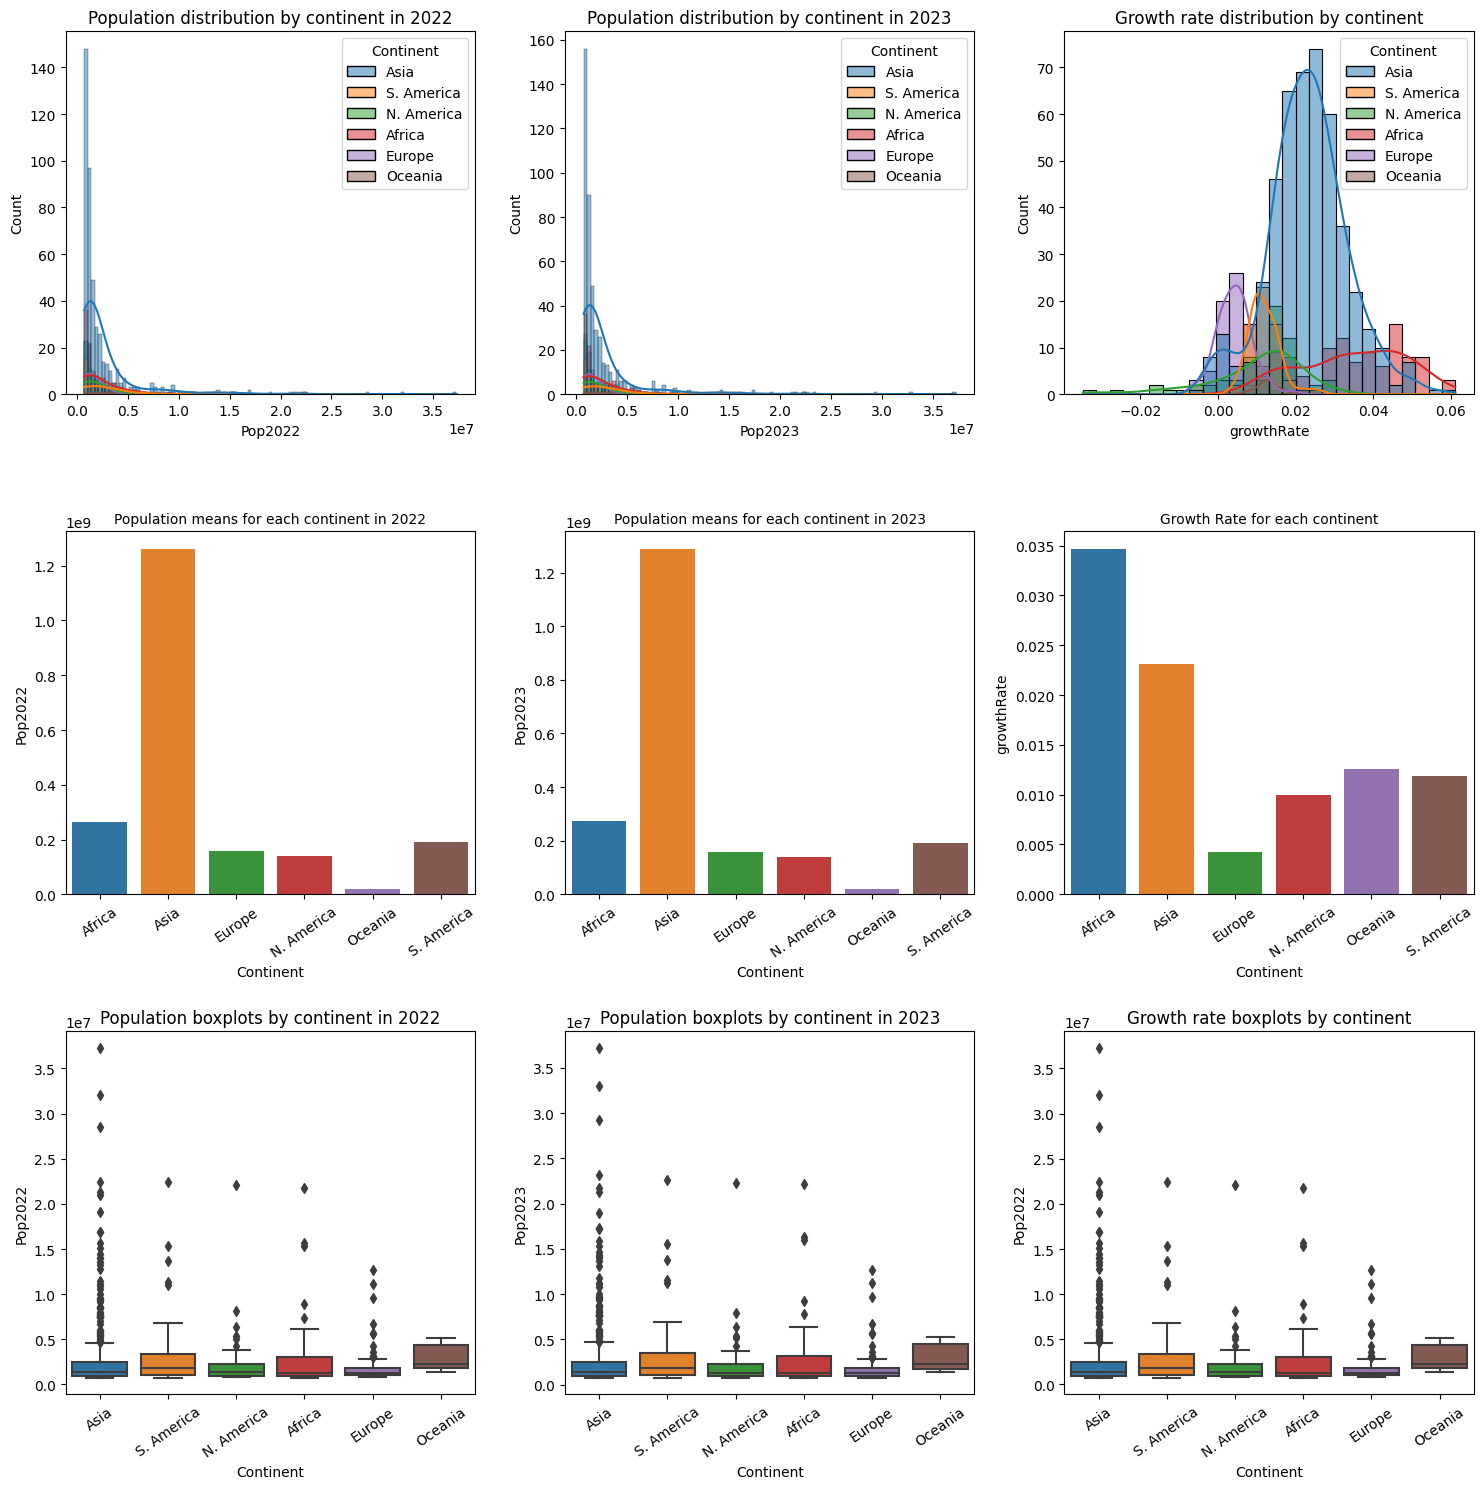

In [13]:
df['Continent'] = df['Continent'].replace('North America', 'N. America', regex=True).replace('South America', 'S. America', regex=True)

grouped = df.groupby('Continent')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
sns.histplot(df, x='Pop2022', hue='Continent', ax=axes[0][0], kde=True)
axes[0][0].set_title("Population distribution by continent in 2022")
sns.histplot(df, x='Pop2023', hue='Continent', ax=axes[0][1], kde=True)
axes[0][1].set_title("Population distribution by continent in 2023")
sns.histplot(df, x='growthRate', hue='Continent', ax=axes[0][2], kde=True)
axes[0][2].set_title("Growth rate distribution by continent")

sns.barplot(x=grouped['Pop2022'].sum().index,
           y=grouped['Pop2022'].sum(),
           ax=axes[1][0])
sns.barplot(x=grouped['Pop2023'].sum().index,
           y=grouped['Pop2023'].sum(),
           ax=axes[1][1])
sns.barplot(x=grouped['growthRate'].mean().index,
           y=grouped['growthRate'].mean(),
           ax=axes[1][2])

axes[1][0].set_title("Population means for each continent in 2022", fontsize=10)
axes[1][1].set_title("Population means for each continent in 2023", fontsize=10)
axes[1][2].set_title("Growth Rate for each continent", fontsize=10)
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=35)
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=35)
axes[1][2].set_xticklabels(axes[1][2].get_xticklabels(), rotation=35)

#for cont1, cont2, cont3 in zip(axes[1][0].containers, axes[1][1].containers, axes[1][2].containers):
    #axes[1][0].bar_label(cont1, size=4, color='black')
    #axes[1][1].bar_label(cont2, size=4, color='black')
    #axes[1][2].bar_label(cont3, size=4, color='black')
   
sns.boxplot(x=df['Continent'], y=df['Pop2022'], ax=axes[2][0])
axes[2][0].set_title("Population boxplots by continent in 2022")
axes[2][0].set_xticklabels(axes[2][0].get_xticklabels(), rotation=35)

sns.boxplot(x=df['Continent'], y=df['Pop2023'], ax=axes[2][1])
axes[2][1].set_title("Population boxplots by continent in 2023")
axes[2][1].set_xticklabels(axes[2][1].get_xticklabels(), rotation=35)

sns.boxplot(x=df['Continent'], y=df['Pop2022'], ax=axes[2][2])
axes[2][2].set_title("Growth rate boxplots by continent")
axes[2][2].set_xticklabels(axes[2][2].get_xticklabels(), rotation=35)


plt.tight_layout()
plt.show()

In [14]:
top_cities_per_country = df.groupby('Country').apply(lambda x: x.nlargest(10, 'Pop2023')).reset_index(drop=True)

fig = px.treemap(top_cities_per_country, path=['Country', 'City'], values='Pop2023',
                 color='Pop2023', hover_data=['Pop2023'],
                 color_continuous_scale='RdBu', title='Total Salary by College and Player Name')

fig.update_layout(template='plotly_white')

fig.show()

In [15]:
fig = px.scatter_geo(df_new, locations="code_3digit", color="Continent",
                     hover_name="City", size="Pop2023",
                     projection="natural earth", title='Population by City',
                     animation_frame="Continent", 
                     color_discrete_sequence=['blue', 'green', 'red', 'yellow', 'orange'])

fig.update_layout(template='plotly')
fig.show()

In [16]:
df_new2 = df_new.groupby(['code_3digit','Country']).agg({'Pop2023': 'sum', 'growthRate': 'mean'}).reset_index()

import plotly
import plotly.graph_objects as go

pop_map = go.Choropleth(
    locations = df_new2['code_3digit'],
    z = df_new2['Pop2023'],
    text = df_new2['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorscale = 'Blues',
    colorbar_title = 'TotalPop'
)

gr_map = go.Choropleth(
    locations = df_new2['code_3digit'],
    z = df_new2['growthRate'],
    text = df_new2['Country'],
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorscale = 'Blues',
    colorbar_title = 'growthRate'
)

data = [pop_map, gr_map]

updatemenus = list([
    dict(type="buttons",
         y=0.7,
         buttons=list([   
            dict(label = 'Population Map',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'Population by Country (include 774 cities)'}]),

            dict(label = 'GrowthRate Map',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'Average Growth Rate by Country'}])
        ]),
    )
])


layout = dict(updatemenus=updatemenus,
             title_text='Top pop/growthRate by Country',
             geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'),
             margin=dict(l=0, r=0, b=0),
             height=500
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig)